In [1]:
# import make_blobs from sklearn
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

from sklearn import metrics

In [49]:
# generate clusters 
X, y = make_blobs(n_samples=10,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

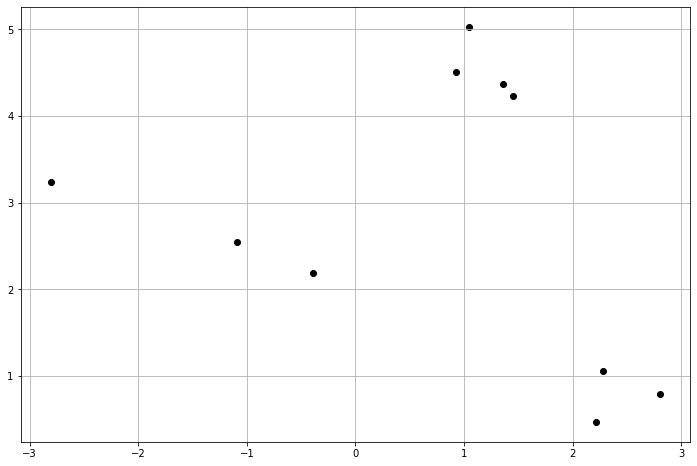

In [50]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

# K-means clustering

In [51]:
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [52]:
# fit and predict
y_km = km.fit_predict(X)
y_km

array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0], dtype=int32)

In [57]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        #print(y_res)
        #print(cluster)
        #print(y_res == cluster)
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        
        #print(x)
        #print(y, '\n')
        
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=100,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [59]:
#y_km

In [60]:
#X

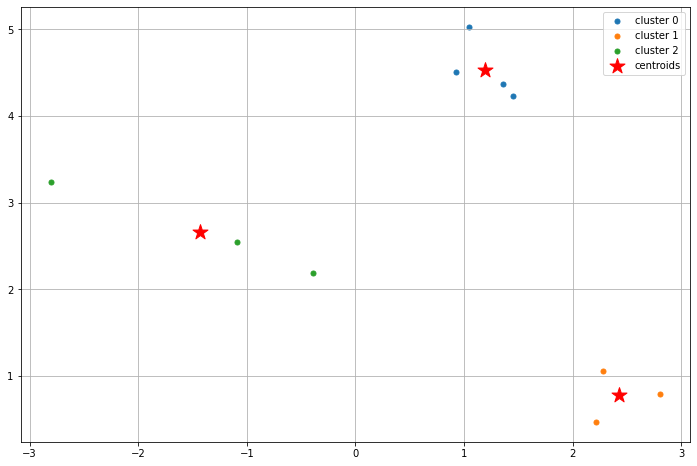

In [61]:
 # plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)

In [62]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

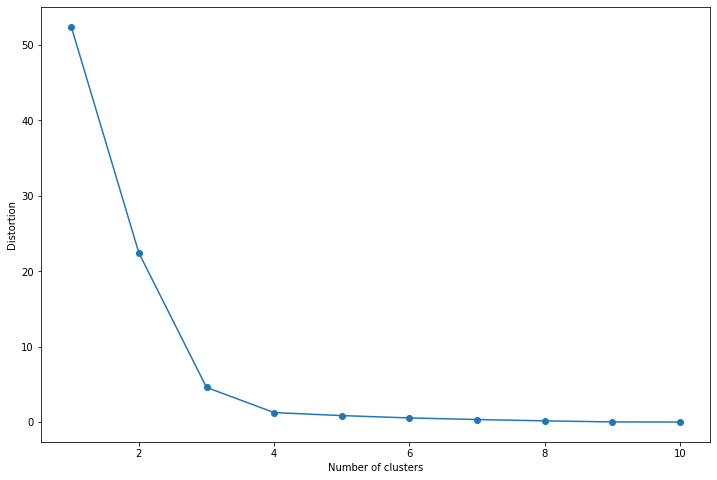

In [90]:
# elbow rule
plot_distortion(X,max_clusters=10)

In [87]:
#silhouette score needs cluster from 1 to 9
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [91]:
# want the max silhouette score
silhouette(X)

[(2, 0.553592317381863),
 (3, 0.7298228536756398),
 (4, 0.6986924098779168),
 (5, 0.5567957842746454),
 (6, 0.4233198502985472),
 (7, 0.19594076050868076),
 (8, 0.18231538808238928),
 (9, 0.13573965653716397)]